In [42]:
import matplotlib.pyplot as plt
import math

In [157]:
class Robot():
    def __init__(self, x,y, alpha,color):
        self.x = x
        self.y = y
        self.alpha = alpha
        self.color = color
        self.speed = 2
        self.angle_speed = 0.2
        self.xhist = []
        self.yhist = []
        self.alphahist = []

In [158]:
robot1 = Robot(100,0,0,"#F455F4")
robot2 = Robot(-100,100,0,"#55F4F4")
robot3 = Robot(-100,-100,0,"#5555F4")
robots = [robot1,robot2,robot3]

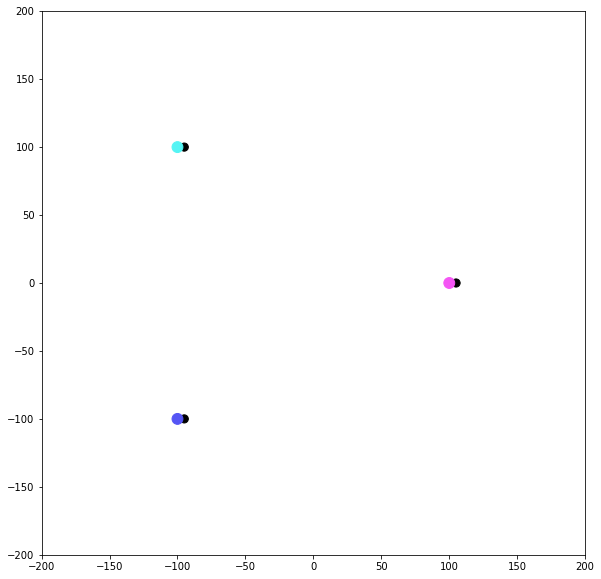

In [159]:
def display_robots(robots):
    plt.rcParams['figure.figsize'] = [10, 10]
    figure, axes = plt.subplots()
    for robot in robots :
        plt.plot(robot.xhist,robot.yhist,color=robot.color)
        draw_circle = plt.Circle((robot.x+5*math.cos(robot.alpha), robot.y+5*math.sin(robot.alpha)), 3,color="black")
        axes.add_artist(draw_circle)
        draw_circle = plt.Circle((robot.x, robot.y), 4,color=robot.color)
        axes.add_artist(draw_circle)
    axes.set_xlim(-200,200)
    axes.set_ylim(-200,200)
    axes.set_aspect(1)
    plt.show()
display_robots(robots)

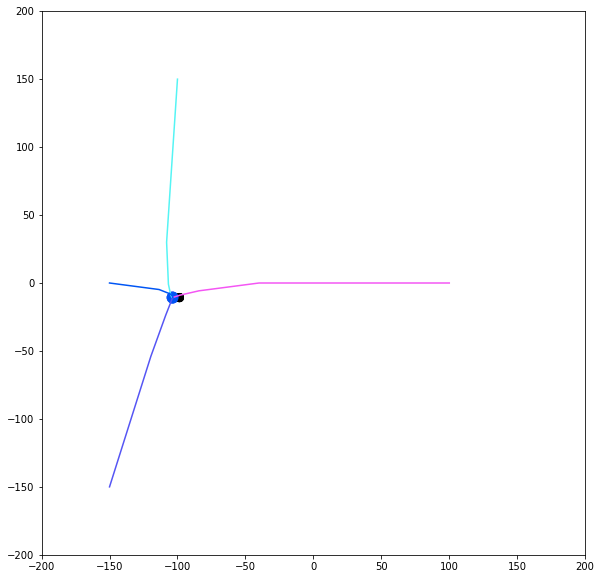

In [160]:
# naive simulation with holonomic robots: 

robot1 = Robot(100,0,0,"#F455F4")
robot2 = Robot(-100,150,0,"#55F4F4")
robot3 = Robot(-150,-150,0,"#5555F4")
robot4 = Robot(-150,0,0,"#0055F4")
robots = [robot1,robot2,robot3,robot4]

for t in range(1000):

    for robot in robots:
        w = 0.2
        robot.xhist.append(robot.x)
        robot.yhist.append(robot.y)
        robot.alphahist.append(robot.alpha)
        
        dx = 0
        dy = 0
        dalpha = 0
        
        for neighbor in robots:            
            
            if neighbor != robot:
                dx = dx+w*(neighbor.x-robot.x)
                dy = dy+w*(neighbor.y-robot.y)
                
        
        
        robot.x = robot.x + dx 
        robot.y = robot.y + dy 
                
                
                
display_robots(robots)

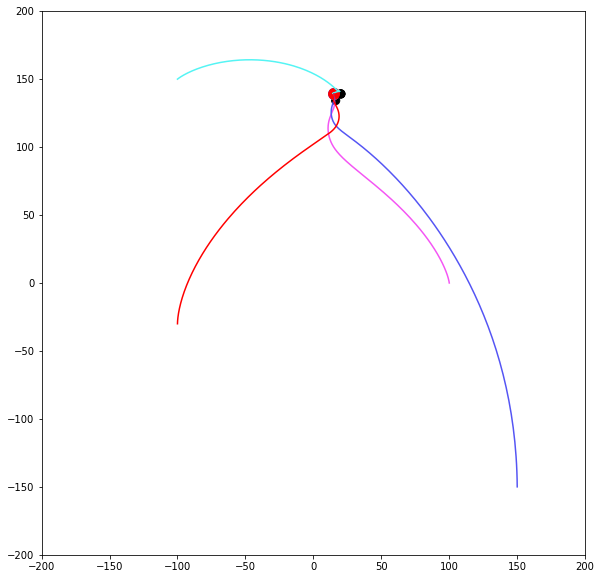

In [162]:
# naive simulation with non holonomic robots: 

robot1 = Robot(100,0,0,"#F455F4")
robot2 = Robot(-100,150,0,"#55F4F4")
robot3 = Robot(150,-150,0,"#5555F4")
robot4 = Robot(-100,-30,0,"#FF0000")
robots = [robot1,robot2,robot3,robot4]

for t in range(1000):

    for robot in robots:
        w = 0.01
        robot.xhist.append(robot.x)
        robot.yhist.append(robot.y)
        robot.alphahist.append(robot.alpha)
        
        dx = 0
        dy = 0
        dalpha = 0
        
        for neighbor in robots:            
            
            if neighbor != robot:
                dx = dx+w*(neighbor.x-robot.x)
                dy = dy+w*(neighbor.y-robot.y)
                
        
        omega = math.atan2(dx,dy)-robot.alpha
        u = max(math.sqrt(dx*dx+dy*dy) * math.cos(omega),0)
        
        robot.alpha = robot.alpha + 0.02*omega
        vx = u * math.sin(robot.alpha)
        vy = u * math.cos(robot.alpha)
        if( math.sqrt(vx*vx+vy*vy)>10):
            vx = (vx/math.sqrt(vx*vx+vy*vy))*10
            vy = (vy/math.sqrt(vx*vx+vy*vy))*10
        robot.x = robot.x + u * math.sin(robot.alpha)
        robot.y = robot.y + u * math.cos(robot.alpha)
                
                
                
display_robots(robots)